# **Sentiment Analysis for Twitter Data**

This Colab notebook is focused on performing sentiment analysis on Twitter data. Sentiment analysis aims to determine the sentiment or emotional tone expressed in a given text. In this case, you'll analyze tweets to classify them into different sentiment categories, such as positive, negative, or neutral.

**Workflow Overview**

1. **Importing Libraries:** The code starts by importing essential libraries for data processing, visualization, and machine learning. These libraries include Pandas, NumPy, NLTK, Seaborn, and Scikit-Learn.

2. **Reading Data:** The Twitter data is read from a CSV file named 'Tweets.csv' into a Pandas DataFrame (`df`). This dataset is used for training and testing the sentiment analysis model.

3. **Data Cleaning and Preprocessing:** Data cleaning and preprocessing steps are essential to prepare the data for analysis. The code checks for missing values, eliminates unnecessary columns, handles duplicate records, and visualizes missing data using heatmaps.

4. **Data Exploration (EDA):** Exploratory data analysis is carried out to understand the dataset better. You'll visualize the distribution of airline sentiments and negative reasons, and plot the distribution of airline sentiment as a pie chart to gain insights.

5. **Text Data Preprocessing:** Since you're dealing with text data, text preprocessing is performed. This involves cleaning the text by removing non-alphabetical characters, converting it to lowercase, and eliminating stopwords (common words that don't provide meaningful information). The cleaned text is stored in a new column called `clean_tweet`.

6. **Data Splitting and Model Training:** The dataset is split into features (X) and target labels (y) for machine learning. Text data is vectorized using the TF-IDF (Term Frequency-Inverse Document Frequency) method, which converts text data into numerical format suitable for machine learning. This vectorizer is fit to the training data and applied to transform both training and test data.

7. **Model Building and Evaluation:** A Support Vector Classifier (SVC) model with a linear kernel is constructed and trained on the transformed training data. The model's performance is evaluated by predicting labels for the test data. Accuracy, confusion matrix, and a classification report are generated to assess the model's effectiveness.

The code takes you through these steps, ultimately allowing you to build a sentiment analysis model for Twitter data. Sentiment analysis can be applied to various domains, including social media monitoring, customer feedback analysis, and more, to understand public sentiment and opinion on different topics.

This notebook serves as a comprehensive guide to performing sentiment analysis and can be extended or adapted for specific use cases. If you have any questions or need further details about a specific part of the code, feel free to ask!


In [2]:
# import contractions library.
!pip install contractions missingno wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.9 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

# Import NLTK and download required resources
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Import other libraries
import re
import string
import unicodedata
import contractions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import wordcloud
from wordcloud import STOPWORDS, WordCloud
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)
# Set options for displaying data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


# **Read the data**

In [5]:
df = pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
texts = [[word.lower() for word in text.split()] for text in df]

In [7]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9155 entries, 0 to 9154
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      9155 non-null   int64  
 1   airline_sentiment             9155 non-null   object 
 2   airline_sentiment_confidence  9155 non-null   float64
 3   negativereason                5084 non-null   object 
 4   negativereason_confidence     6007 non-null   float64
 5   airline                       9155 non-null   object 
 6   airline_sentiment_gold        21 non-null     object 
 7   name                          9155 non-null   object 
 8   negativereason_gold           17 non-null     object 
 9   retweet_count                 9155 non-null   int64  
 10  text                          9155 non-null   object 
 11  tweet_coord                   689 non-null    object 
 12  tweet_created                 9154 non-null   object 
 13  twe

# **Observations:**
There are 15 columns in the dataset. Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing. Most columns in the dataset are of object type. airline_sentiment is our dependent / target variable. text column is our independent variable that we will use for analysis. All other columns will be dropped at a later stage.

In [9]:
df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  4071
negativereason_confidence       3148
airline                            0
airline_sentiment_gold          9134
name                               0
negativereason_gold             9138
retweet_count                      0
text                               0
tweet_coord                     8466
tweet_created                      1
tweet_location                  2845
user_timezone                   2857
dtype: int64

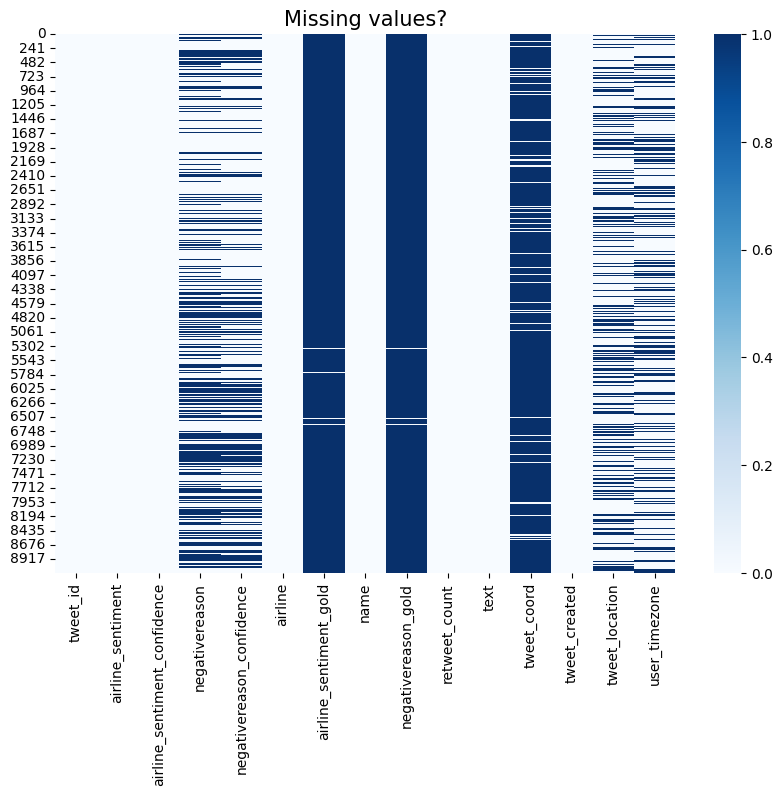

In [10]:
#Visualization of missing value using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap = "Blues")
plt.title("Missing values?", fontsize = 15)
plt.show()

In [11]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  44.47
negativereason_confidence       34.39
airline                          0.00
airline_sentiment_gold          99.77
name                             0.00
negativereason_gold             99.81
retweet_count                    0.00
text                             0.00
tweet_coord                     92.47
tweet_created                    0.01
tweet_location                  31.08
user_timezone                   31.21
dtype: float64

Airline_sentiment_gold, negativereason_gold have more than 99% missing data And tweet_coord have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [12]:
df.drop(["tweet_coord", "airline_sentiment_gold", "negativereason_gold"], axis=1, inplace=True)

In [13]:
freq = df.groupby("negativereason").size()

In [14]:
df.duplicated().sum()

0

In [15]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,9155.0,5.690615e+17,7.845396e+14,5.675883e+17,5.684299e+17,5.691657e+17,5.697061e+17,5.703106e+17
airline_sentiment_confidence,9155.0,8.880371e-01,1.692405e-01,3.350000e-01,6.832000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,6007.0,6.077161e-01,3.398559e-01,0.000000e+00,3.520000e-01,6.663000e-01,1.000000e+00,1.000000e+00
retweet_count,9155.0,9.339159e-02,6.523139e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01


# **EDA**

In [18]:
df.nunique()

tweet_id                        9155
airline_sentiment                  3
airline_sentiment_confidence     874
negativereason                    10
negativereason_confidence       1100
airline                            5
name                            5161
retweet_count                     14
text                            9114
tweet_created                   9065
tweet_location                  2182
user_timezone                     73
dtype: int64

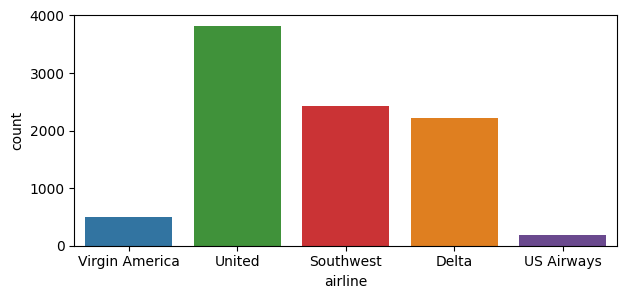

In [19]:
# Checking the distribution of airlines
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='airline', palette=['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3'])
plt.show()

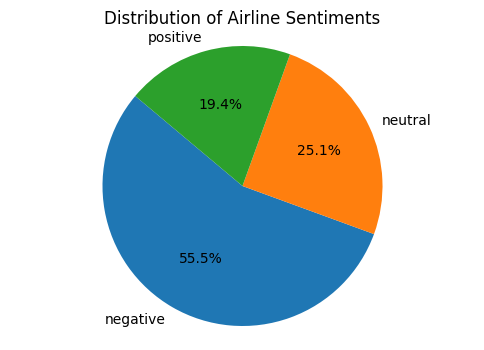

In [20]:
# Visualize the distribution of airline sentiments using a pie chart
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

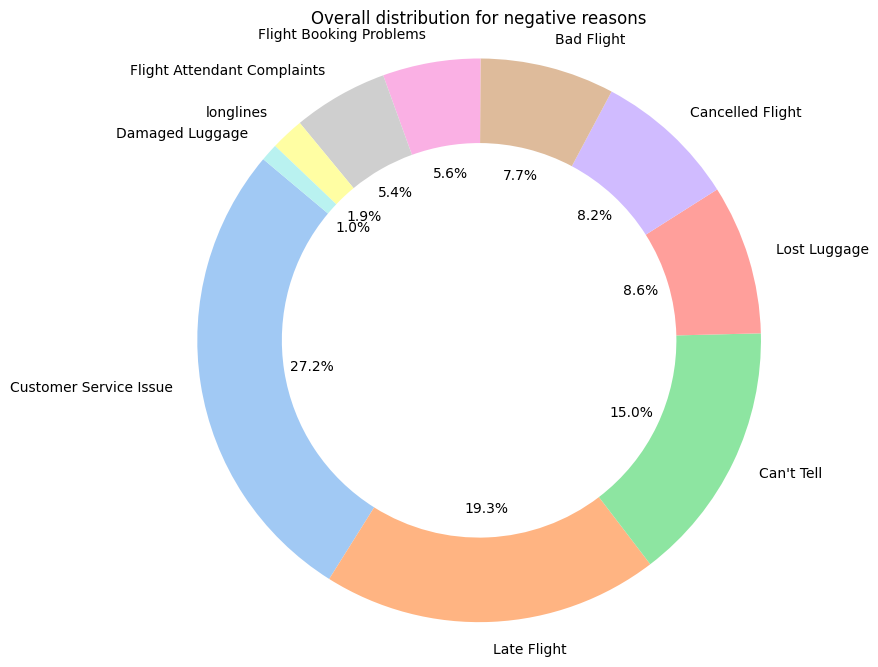

In [21]:
# Calculate the value counts for each negative reason
value_counts = df['negativereason'].value_counts()

# Create a donut-like pie chart using matplotlib and seaborn
plt.figure(figsize=(8, 8))
labels = value_counts.index
values = value_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]  # Use pastel colors for the chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Overall distribution for negative reasons')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

# **Data clearing and preprocessing of Text**

In [22]:
# Select only the necessary columns for sentiment analysis
df = df[['airline_sentiment', 'text']].copy()
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
9150,negative,@USAirways is utterly unreliable! They didn't ...
9151,negative,@USAirways yes but again valuable time has bee...
9152,negative,@USAirways I don't like being lied to. No bad ...
9153,negative,@USAirways yes it landed at 11:40am. Should no...


In [23]:
X = df["text"]
y = df["airline_sentiment"]
X
y


0        neutral
1       positive
2        neutral
3       negative
4       negative
          ...   
9150    negative
9151    negative
9152    negative
9153    negative
9154    negative
Name: airline_sentiment, Length: 9155, dtype: object

# **Model Training**

In [24]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7324,) (1831,) (7324,) (1831,)


In [26]:
# Create a TF-IDF vectorizer with English stop words removal for text feature extraction.
tfidf = TfidfVectorizer(stop_words="english")

In [27]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [28]:
print(tfidf.get_feature_names_out())

['00' '000' '000114' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [29]:
print(tfidf.vocabulary_)

{'united': 9350, 'hope': 4681, 'corporate': 2721, 'office': 6478, 'ready': 7322, 'deal': 2949, 'rage': 7272, 'created': 2802, 'shitty': 8046, 'service': 7984, 'bullshit': 2065, 'pilots': 6868, 'unitedairlinessucks': 9357, 'lost': 5673, 'bags': 1683, 'cancelled': 2168, 'flight': 3918, 'home': 4655, '30': 439, 'min': 6002, 'wait': 9621, 'talk': 8703, 'somebody': 8255, 'poorservice': 6958, 'notgoodenough': 6380, 'southwestair': 8287, 'engadget': 3497, 'theverge': 8825, 'wired': 9811, 'reddit': 7382, 'nope': 6359, 'sitting': 8132, 'gate': 4196, 'jetblue': 5158, 'ellahenderson': 3451, 'omg': 6509, 'wish': 9814, 'today': 8944, 'haha': 4444, 'time': 8892, 'fun': 4140, 'lft5': 5506, 'just': 5246, 'like': 5540, 'clockwork': 2442, 'friday': 4094, 'afternoon': 1188, 'flights': 3945, 'las': 5413, 'den': 3024, 'running': 7750, 'late': 5422, 'does': 3247, 'happen': 4478, 'consistently': 2654, 'keepit100': 5287, 'amazing': 1315, 'short': 8056, 'delay': 2995, 'gave': 4198, '150': 163, 'credit': 2806, 

In [30]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(df[df["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names_out(), neg_matrix.sum(axis=0).tolist()[0])
# Sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('united', 2864), ('flight', 1607), ('southwestair', 1205), ('jetblue', 1041), ('cancelled', 447), ('service', 386), ('just', 375), ('time', 357), ('customer', 326), ('delayed', 317), ('hours', 299), ('plane', 297), ('amp', 281), ('http', 279), ('help', 272), ('bag', 257), ('flights', 250), ('hour', 243), ('hold', 239), ('gate', 220), ('don', 214), ('late', 205), ('flightled', 204), ('ve', 196), ('virginamerica', 190), ('delay', 177), ('like', 174), ('airline', 168), ('need', 167), ('waiting', 167), ('thanks', 165), ('got', 157), ('bags', 152), ('phone', 148), ('trying', 145), ('usairways', 144), ('airport', 142), ('today', 142), ('fly', 141), ('minutes', 140), ('really', 140), ('did', 138), ('lost', 137), ('wait', 135), ('going', 132), ('luggage', 129), ('day', 128), ('people', 127), ('worst', 127), ('check', 121), ('told', 121), ('baggage', 120), ('seat', 119), ('make', 117), ('want', 114), ('know', 112), ('flying', 107), ('guys', 104), ('way', 103), ('getting', 102), ('flighted', 1

# **Wordcloud for Negative Reasons**

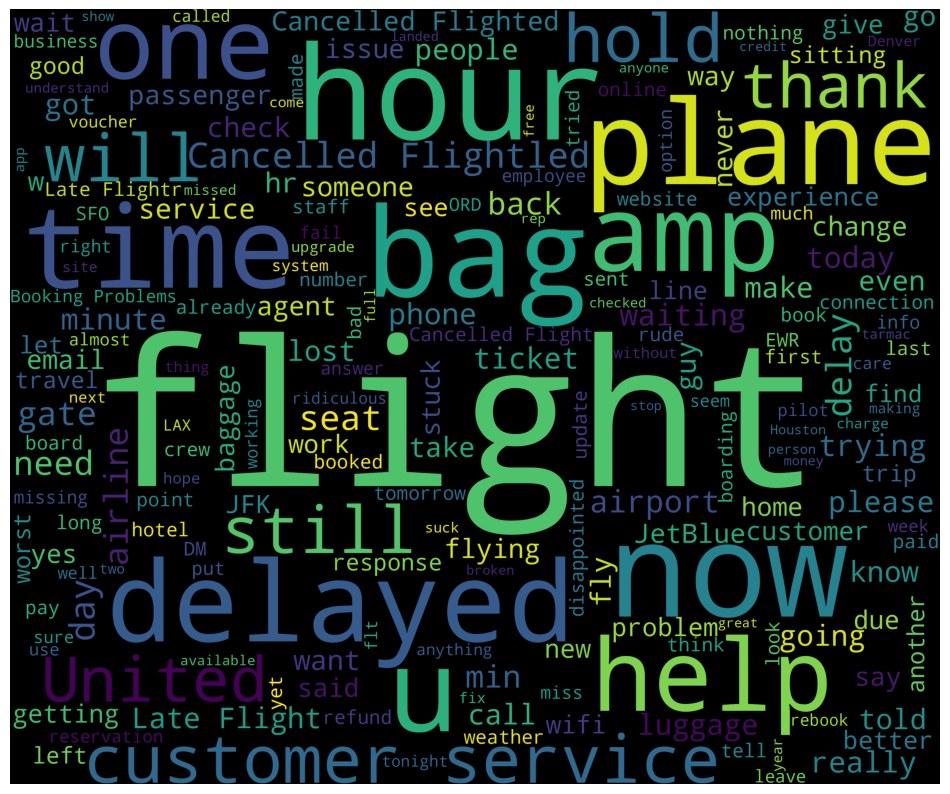

In [31]:
new_df = df[df["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **Data Scaling**

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df["airline_sentiment"])
df["airline_sentiment_encoded"] = le.transform(df["airline_sentiment"])
df.head()

,airline_sentiment,text,airline_sentiment_encoded
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [33]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join( meaningful_words ))

In [34]:
nltk.download("stopwords")
df["clean_tweet"] = df["text"].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9155 entries, 0 to 9154
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   airline_sentiment          9155 non-null   object
 1   text                       9155 non-null   object
 2   airline_sentiment_encoded  9155 non-null   int64 
 3   clean_tweet                9155 non-null   object
dtypes: int64(1), object(3)
memory usage: 357.6+ KB


In [36]:
X = df["clean_tweet"]
y = df["airline_sentiment"]

In [37]:
print(X.shape, y.shape)

(9155,) (9155,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [39]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [40]:
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

# **Tuning**

In [41]:
vect_tunned = CountVectorizer(stop_words = "english", ngram_range = (1, 2), min_df = 0.1, max_df = 0.7, max_features = 100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

# **Model Building**

In [42]:
from sklearn.svm import SVC
model = SVC(kernel = "linear", random_state = 10)
model.fit(X_train_dtm, y_train)
pred = model.predict(X_test_dtm)

In [43]:
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)

Accuracy Score:  74.87986020096112


In [44]:
print("Confusion Matrix\n\n", confusion_matrix(y_test, pred))

Confusion Matrix

 [[1073  164   68]
 [ 137  352   63]
 [  78   65  289]]


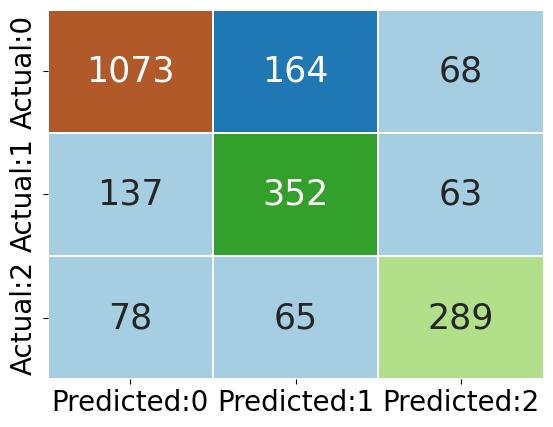

In [45]:
# Assuming that 'y_test' and 'pred' contain labels for a multi-class problem with three classes
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, pred), columns=['Predicted:0', 'Predicted:1', 'Predicted:2'], index=['Actual:0', 'Actual:1', 'Actual:2'])

# Plot the 3x3 confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Paired', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.83      0.82      0.83      1305
     neutral       0.61      0.64      0.62       552
    positive       0.69      0.67      0.68       432

    accuracy                           0.75      2289
   macro avg       0.71      0.71      0.71      2289
weighted avg       0.75      0.75      0.75      2289

